# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [3]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [4]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [5]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12) 

In [7]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [8]:
# Acá realizá la predicción
y_pred = dtr.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [9]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
import math

In [10]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"Se obtiene un rmse de: {rmse}")

Se obtiene un rmse de: 26060.29360532891


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [11]:
max_depths = [depth for depth in range(1, 30, 5)]
rmses_train = []
rmses_test = []
for depth in max_depths:
    dtr = DecisionTreeRegressor(max_depth= depth)
    dtr.fit(X_train, y_train)
    train_pred = dtr.predict(X_train)
    mse = mean_squared_error(train_pred, y_train)
    rmses_train.append(math.sqrt(mse))
    test_pred = dtr.predict(X_test)
    mse = mean_squared_error(test_pred, y_test)
    rmses_test.append(math.sqrt(mse))

In [12]:
rmses_train

[26505.57137562935,
 20039.3298806282,
 13638.652420663346,
 7284.329949244236,
 3391.185514139135,
 981.6669795927479]

In [13]:
rmses_test

[27186.214244028906,
 22499.061039210028,
 23917.819111056,
 25429.311315356717,
 26002.011800969573,
 26319.708965708487]

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

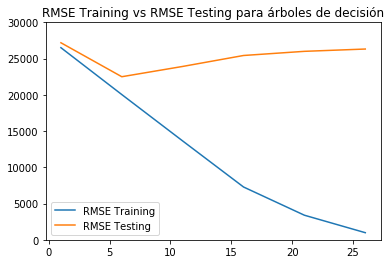

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [15]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
pred = knn.predict(X_test)
rmse = math.sqrt(mean_squared_error(pred, y_test))
print(f"El rmse obtenido es: {rmse}")

El rmse obtenido es: 23887.153024978325


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [16]:
# Calculá los cambio en el rmse en esta celda
rmses_train = [] 
rmses_test = []
for k in range(1,30, 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    mse = mean_squared_error(train_pred, y_train)
    rmses_train.append(math.sqrt(mse))
    test_pred = knn.predict(X_test)
    mse = mean_squared_error(test_pred, y_test)
    rmses_test.append(math.sqrt(mse))

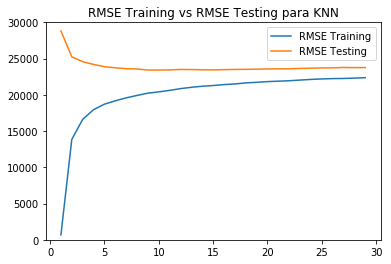

In [17]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [18]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [23]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)
regressor = tree.DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(cv=10, estimator=regressor, X=X_train, y=y_train, scoring="neg_mean_squared_error")

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [26]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [27]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [28]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,143000.000,135574.659,7425.341
1,85000.000,135574.659,50574.659
2,118000.000,114644.572,3355.428
3,111167.000,123925.565,12758.565
4,90000.000,106985.429,16985.429
5,149000.000,147151.712,1848.288
6,135000.000,144238.548,9238.548
7,165000.000,142510.938,22489.062
8,138000.000,147151.712,9151.712
9,140000.000,121257.359,18742.641
